<a href="https://colab.research.google.com/github/nhareesha/MLAI/blob/main/ML/ModelSection_crossvalidation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from sklearn.model_selection import KFold, LearningCurveDisplay, cross_val_score, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt


## Some importatant datasets

Multiclass classification dataset - load_wine, load_iris

In [2]:
# Multiclass classification dataset
data = load_iris()
X = data.data
y = data.target

## Data exploration

In [3]:
print(type(X))
print(X.shape)
print(X[:5, :])


<class 'numpy.ndarray'>
(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [4]:
print(type(y))
print(y.shape)
print(y[:]) # 3 classifiers

<class 'numpy.ndarray'>
(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## Function to check duplicates

In [5]:
# Accepts ndarray and returns duplicate rows
def find_duplicate_row(arr):
  seen = set()
  duplicates = []
  for row in X:
    row_tuple = tuple(row)
    if row_tuple in seen:
      duplicates.append(row_tuple)
    seen.add(row_tuple)

  return duplicates

In [6]:
from io import DEFAULT_BUFFER_SIZE
#Find if there are any duplicate entries in X

duplicates = find_duplicate_row(X)

print(len(duplicates))
print(duplicates)

1
[(5.8, 2.7, 5.1, 1.9)]


### Note


#### Scikit-learn is ideal for traditional machine learning tasks, quick prototyping, and smaller datasets. It is user-friendly and integrates well with other Python libraries.



#### TensorFlow is suited for deep learning and large-scale machine learning tasks, providing high performance and flexibility. It is more complex but powerful for building and training neural networks.



In [10]:
# Define the model - RandomForestClassifier
model = RandomForestClassifier()

# Define K-Fold Cross-Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

# Perform Cross-Validation
scores_rf = cross_val_score(model, X, y, cv=kfold)

In [11]:
print("Cross-Validation Scores:", scores_rf)
print("Average Cross-Validation Score:", scores_rf.mean())

Cross-Validation Scores: [0.96666667 0.96666667 0.93333333 0.93333333 0.9       ]
Average Cross-Validation Score: 0.9400000000000001


In [29]:
model_lr = LogisticRegression(max_iter=500, random_state=42)

# Perform Cross-Validation
scores_lr = cross_val_score(model_lr, X, y, cv=kfold)


In [30]:
print("Cross-Validation Scores:", scores_lr)
print("Average Cross-Validation Score:", scores_lr.mean())

Cross-Validation Scores: [0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
Average Cross-Validation Score: 0.96


Comparing the above two models it is evident that Logistic Regression classifier has better predective accuracy vs RandomForestClassifier.

## Learning curves

### `Training Score:` This indicates how well the model is performing on the training data. A high training score typically indicates that the model is learning well from the training data.


### `Validation Score`: This indicates how well the model is performing on unseen data (cross-validation sets). A high validation score means that the model generalizes well to new data.


### Gap Between Training and Validation Scores:

- `A large gap with high training scores and low validation scores indicates - overfitting.`


- `Small gaps with both scores converging to a high value indicate good generalization.`


- `If both scores are low, it suggests underfitting.`

By analyzing the learning curves, you can diagnose whether your model is underfitting, overfitting, or performing well. This can guide further steps, such as collecting more data, choosing a different model, or tuning hyperparameters.

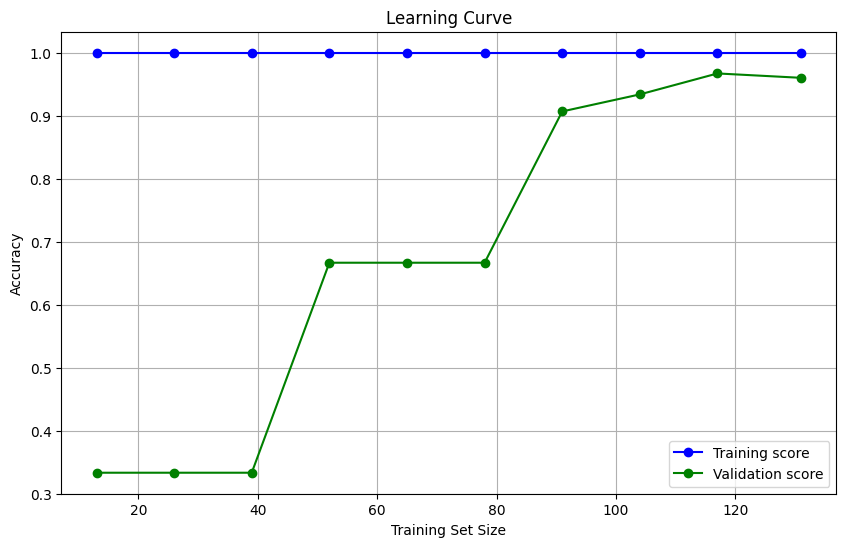

In [ ]:
# Generate learning curves
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=model,
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),  # Vary training sizes from 10% to 100%
    cv=8,  # Use 5-fold cross-validation
    scoring='accuracy',  # Metric to evaluate
    n_jobs=-1  # Use all available CPU cores
)

# Calculate mean and standard deviation
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, validation_scores_mean, 'o-', color='green', label='Validation score')

plt.fill_between(train_sizes,
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std,
                 alpha=0.1, color='blue')
plt.fill_between(train_sizes,
                 validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std,
                 alpha=0.1, color='green')

plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()

## Decision boundary when using RandomForestClassifier

(120, 4)
(30, 4)
(120,)
(30,)


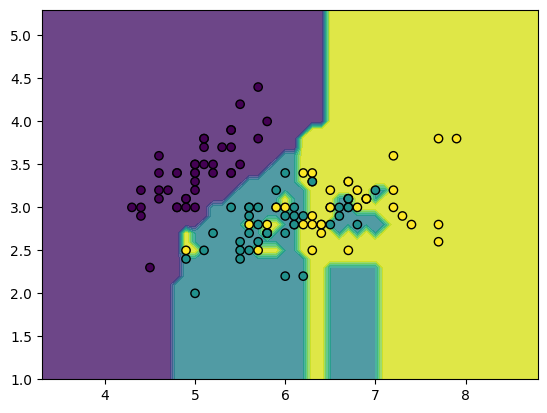

In [19]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Train the model with data having only 2 features (for simplicity in this example)
# X_train should be a dataset with only 2 features
# y_train should be the corresponding labels
model.fit(X_train[:, :2], y_train)

# Assuming `model` is your trained model and `X_train` is your training data
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o')
plt.show()

# Decision boundary when using LinearRegressor - OLS optimizer

(120, 4)
(30, 4)
(120,)
(30,)


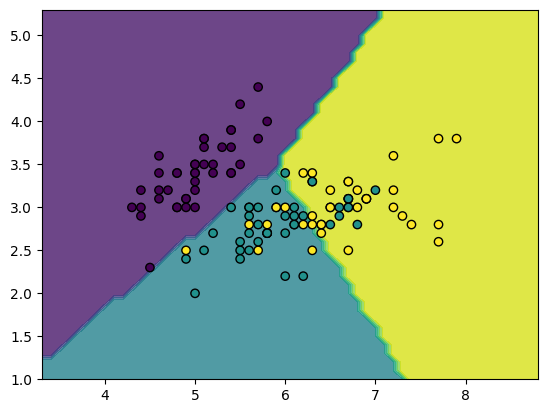

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Train the model with data having only 2 features (for simplicity in this example)
# X_train should be a dataset with only 2 features
# y_train should be the corresponding labels
model_lr.fit(X_train[:, :2], y_train)

# Assuming `model` is your trained model and `X_train` is your training data
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = model_lr.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o')
plt.show()